# 随机森林

## 1、 概述

### 1.1、集成算法概述

集成学习（ensemble learning）是时下非常流行的机器学习算法，它本身不是一个单独的机器学习算法，而是通
过在数据上构建多个模型，集成所有模型的建模结果。基本上所有的机器学习领域都可以看到集成学习的身影，在
现实中集成学习也有相当大的作用，它可以用来做市场营销模拟的建模，统计客户来源，保留和流失，也可用来预
测疾病的风险和病患者的易感性。在现在的各种算法竞赛中，随机森林，梯度提升树（GBDT），Xgboost等集成
算法的身影也随处可见，可见其效果之好，应用之广。

- 集成算法的目标

    集成算法会考虑多个评估器的建模结果，汇总之后得到一个综合的结果，以此来获取比单个模型更好的回归或分类表现。

多个模型集成成为的模型叫做集成评估器（ensemble estimator），组成集成评估器的每个模型都叫做基评估器
（base estimator）。通常来说，有三类集成算法：装袋法（Bagging），提升法（Boosting）和stacking。

![](../imgs/randomforest.png)

装袋法的核心思想是构建多个**相互独立的评估器**，然后对其预测进行平均或多数表决原则来决定集成评估器的结果。**装袋法的代表模型就是随机森林。**

提升法中，**基评估器是相关的**，是按顺序一一构建的。其核心思想是结合弱评估器的力量一次次对难以评估的样本进行预测，从而构成一个强评估器。提升法的代表模型有Adaboost和梯度提升树。

### 1.2、 sklearn中的集成算法

- sklearn中的集成算法模块ensemble

| 类  | 类的功能 |
|-----|---------|
| ensemble.AdaBoostClassifier | AdaBoost分类 |
| ensemble.AdaBoostRegressor | Adaboost回归 |
| ensemble.BaggingClassifier | 装袋分类器 |
| ensemble.BaggingRegressor | 装袋回归器 |
| ensemble.ExtraTreesClassifier | Extra-trees分类（超树，极端随机树） |
| ensemble.ExtraTreesRegressor | Extra-trees回归 |
| ensemble.GradientBoostingClassifier | 梯度提升分类 |
| ensemble.GradientBoostingRegressor | 梯度提升回归 |
| ensemble.IsolationForest | 隔离森林 |
| **ensemble.RandomForestClassifier** | **随机森林分类** |
| **ensemble.RandomForestRegressor** | **随机森林回归** |
| ensemble.RandomTreesEmbedding | 完全随机树的集成 |
| ensemble.VotingClassifier | 用于不合适估算器的软投票/多数规则分类器 |

    集成算法中，有一半以上都是树的集成模型，可以想见决策树在集成中必定是有很好的效果。在这堂课中，我们会以随机森林为例，慢慢为大家揭开集成算法的神秘面纱。

- 复习：sklearn中的决策树

    在开始随机森林之前，我们先复习一下决策树。决策树是一种原理简单，应用广泛的模型，它可以同时被用于分类和回归问题。决策树的主要功能是从一张有特征和标签的表格中，通过对特定特征进行提问，为我们总结出一系列决策规则，并用树状图来呈现这些决策规则。

![](../imgs/temp_example.png)

决策树的核心问题有两个，一个是如何找出正确的特征来进行提问，即如何分枝，二是树生长到什么时候应该停
下。

对于第一个问题，我们定义了用来衡量分枝质量的指标不纯度，分类树的不纯度用基尼系数或信息熵来衡量，回归树的不纯度用MSE均方误差来衡量。每次分枝时，决策树对所有的特征进行不纯度计算，选取不纯度最低的特征进
行分枝，分枝后，又再对被分枝的不同取值下，计算每个特征的不纯度，继续选取不纯度最低的特征进行分枝。

![](../imgs/decisiontree.webp)

每分枝一层，树整体的不纯度会越来越小，决策树追求的是最小不纯度。因此，决策树会一致分枝，直到没有更多
的特征可用，或整体的不纯度指标已经最优，决策树就会停止生长。

决策树非常容易过拟合，这是说，它很容易在训练集上表现优秀，却在测试集上表现很糟糕。为了防止决策树的过
拟合，要对决策树进行剪枝，sklearn中提供了大量的剪枝参数.

## 2、RandomForestClassifier
`class sklearn.ensemble.RandomForestClassifier (n_estimators=’10’, criterion=’gini’, max_depth=None,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’,
max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False,
n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)`

随机森林是非常具有代表性的Bagging集成算法，它的所有基评估器都是决策树，分类树组成的森林就叫做随机森
林分类器，回归树所集成的森林就叫做随机森林回归器。这一节主要讲解RandomForestClassifier，随机森林分类
器。

### 2.1、重要参数

#### 2.1.1、控制基评估器的参数

| 参数  | 含义 |
|-----|---------|
| criterion | 不纯度的衡量指标，有基尼系数和信息熵两种选择 |
| max_depth | 树的最大深度，超过最大深度的树枝都会被剪掉 |
| min_samples_leaf | 一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分枝就不会发生 |
| min_samples_split | 一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则分枝就不会发生 |
| max_features | max_features限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃，默认值为总特征个数开平方取整 |
| min_impurity_decrease | 限制信息增益的大小，信息增益小于设定数值的分枝不会发生 |

这些参数在随机森林中的含义，和在上决策树时说明的内容一模一样，单个决策树的准确率越高，随机森林的准确率也会越高，因为装袋法是依赖于平均值或者少数服从多数原则来决定集成的结果的。


#### 2.1.2、n_estimators

这是森林中树木的数量，即基评估器的数量。这个参数对随机森林模型的精确性影响是单调的，**n_estimators越
大，模型的效果往往越好。**但是相应的，任何模型都有决策边界，n_estimators达到一定的程度之后，随机森林的
精确性往往不在上升或开始波动，并且，n_estimators越大，需要的计算量和内存也越大，训练的时间也会越来越
长。对于这个参数，我们是渴望在训练难度和模型效果之间取得平衡。

n_estimators的默认值在现有版本的sklearn中是10，但是在即将更新的0.22版本中，这个默认值会被修正为
100。这个修正显示出了使用者的调参倾向：要更大的n_estimators。

- 来建立一片森林吧

    树模型的优点是简单易懂，可视化之后的树人人都能够看懂，可惜随机森林是无法被可视化的。所以为了更加直观地让大家体会随机森林的效果，我们来进行一个随机森林和单个决策树效益的对比。我们依然使用红酒数据集。


In [141]:
# 导入包
import numpy as np
import sklearn
from scipy.special import comb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_wine, load_boston
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

In [9]:
# 导入数据集
wine = load_wine()
print(wine.data, wine.target, wine.data.shape, dir(wine),sep='\n'*3)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


(178, 13)


['DESCR', 'data', 'feature_names', 'target', 'target_names']


In [91]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=.3)

In [93]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0, 
#                              n_estimators=100
                            )

clf = clf.fit(Xtrain, Ytrain)
rfc = rfc.fit(Xtrain, Ytrain)

score_c = clf.score(Xtest, Ytest)
score_r = clf.score(Xtest, Ytest)

print("Single Tree:{}".format(score_c),
     "Random Forest:{}".format(score_r))


Single Tree:0.9259259259259259 Random Forest:0.9259259259259259


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


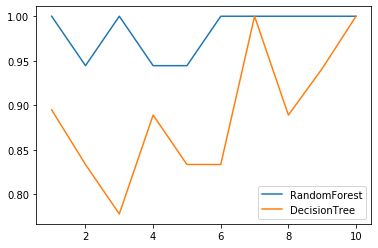

In [107]:
# 交叉验证

# rfc = RandomForestClassifier(n_estimators=25)
# rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

# clf = DecisionTreeClassifier()
# clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

# plt.plot(range(1,11), rfc_s, label="Random Forest") # 如果需要label就不能写在同一个plot中
# plt.plot(range(1,11), clf_s, label="Decision Tree")
# plt.legend()
# plt.show()

# 简单写法
label = "RandomForest"
for model in [RandomForestClassifier(n_estimators=25), DecisionTreeClassifier()]:
    score = cross_val_score(model, wine.data, wine.target, cv=10)
    plt.plot(range(1,11), score, label=label)
    label="DecisionTree"
plt.legend()
plt.show()

#### 画出随机森林和决策树在十组交叉验证下的效果对比

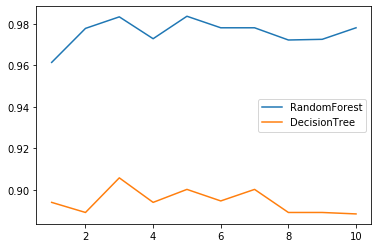

In [114]:
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11), rfc_l, label="RandomForest")
plt.plot(range(1,11), clf_l, label="DecisionTree")
plt.legend()
plt.show()

#### n_estimators的学习曲线

0.9888888888888889 33


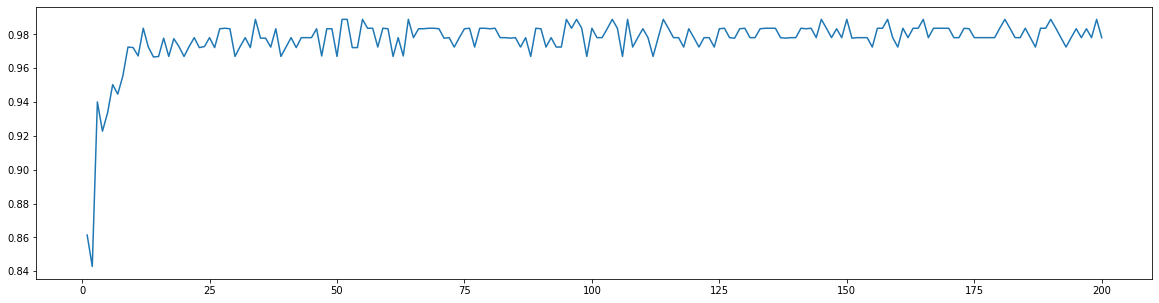

In [108]:
# 需要点时间
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

#### 2.1.3、random_state

随机森林的本质是一种装袋集成算法（bagging），装袋集成算法是对基评估器的预测结果进行平均或用多数表决
原则来决定集成评估器的结果。在刚才的红酒例子中，我们建立了25棵树，对任何一个样本而言，平均或多数表决
原则下，当且仅当有13棵以上的树判断错误的时候，随机森林才会判断错误。单独一棵决策树对红酒数据集的分类
准确率在0.85上下浮动，假设一棵树判断错误的可能性为0.2(ε)，那20棵树以上都判断错误的可能性是：

![](../imgs/randomforest_calculate.png)

其中，i是判断错误的次数，也是判错的树的数量，ε是一棵树判断错误的概率，（1-ε）是判断正确的概率，共判对
25-i次。采用组合，是因为25棵树中，有任意i棵都判断错误

In [118]:
np.array([comb(25,i) * (0.2 ** i)*((1-0.2)**(25-i)) for i in range(13, 26)]).sum()

0.00036904803455582827

可见，判断错误的几率非常小，这让随机森林在红酒数据集上的表现远远好于单棵决策树。

那现在就有一个问题了：我们说袋装法服从多数表决原则或对基分类器结果求平均，这即是说，我们默认森林中的
每棵树应该是不同的，并且会返回不同的结果。设想一下，如果随机森林里所有的树的判断结果都一致（全判断对
或全判断错），那随机森林无论应用何种集成原则来求结果，都应该无法比单棵决策树取得更好的效果才对。但我
们使用了一样的类DecisionTreeClassifier，一样的参数，一样的训练集和测试集，为什么随机森林里的众多树会有
不同的判断结果？

问到这个问题，很多小伙伴可能就会想到了：sklearn中的分类树DecisionTreeClassifier自带随机性，所以随机森
林中的树天生就都是不一样的。我们在讲解分类树时曾提到，决策树从最重要的特征中随机选择出一个特征来进行
分枝，因此每次生成的决策树都不一样，这个功能由参数random_state控制。

随机森林中其实也有random_state，用法和分类树中相似，只不过在分类树中，一个random_state只控制生成一
棵树，而随机森林中的random_state控制的是生成森林的模式，而非让一个森林中只有一棵树。

In [154]:
rfc = RandomForestClassifier(n_estimators=20,random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)
# 随机森林的重要属性之一：estimators，查看森林中树的状况
rfc.estimators_[0].random_state
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


我们可以观察到，当random_state固定时，随机森林中生成是一组固定的树，但每棵树依然是不一致的，这是
用”随机挑选特征进行分枝“的方法得到的随机性。并且我们可以证明，当这种随机性越大的时候，袋装法的效果一
般会越来越好。用袋装法集成时，基分类器应当是相互独立的，是不相同的。

但这种做法的局限性是很强的，当我们需要成千上万棵树的时候，数据不一定能够提供成千上万的特征来让我们构
筑尽量多尽量不同的树。因此，除了random_state。我们还需要其他的随机性。

#### 2.1.4、bootstrap & oob_score

要让基分类器尽量都不一样，一种很容易理解的方法是使用不同的训练集来进行训练，而袋装法正是通过有放回的
随机抽样技术来形成不同的训练数据，bootstrap就是用来控制抽样技术的参数。

在一个含有n个样本的原始训练集中，我们进行随机采样，每次采样一个样本，并在抽取下一个样本之前将该样本
放回原始训练集，也就是说下次采样时这个样本依然可能被采集到，这样采集n次，最终得到一个和原始训练集一
样大的，n个样本组成的自助集。由于是随机采样，这样每次的自助集和原始数据集不同，和其他的采样集也是不
同的。这样我们就可以自由创造取之不尽用之不竭，并且互不相同的自助集，用这些自助集来训练我们的基分类
器，我们的基分类器自然也就各不相同了。

**bootstrap参数默认True，代表采用这种有放回的随机抽样技术。**通常，这个参数不会被我们设置为False。

![](../imgs/bootstraped_sample.png)

然而有放回抽样也会有自己的问题。由于是有放回，一些样本可能在同一个自助集中出现多次，而其他一些却可能
被忽略，一般来说，自助集大约平均会包含63%的原始数据。因为每一个样本被抽到某个自助集中的概率为：

![](../imgs/bootstraped_sample_gailv.png)

```
上面的公式是，一个自助集中，只要n次抽样中有一次抽到这个样本，这个样本就算被抽到。
逆向思维：其中（1 - 1/n）^n：是在一个自助集中，样本A永远不会被抽到的概率，1-（1 - 1/n）^n：就是一个样本被抽到的概率

而：(1/n)^n  是一个自助集中，n次抽样都抽到这个样本的概率

```

当n足够大时，这个概率收敛于1-(1/e)，约等于0.632。因此，会有约37%的训练数据被浪费掉，没有参与建模，
这些数据被称为袋外数据(out of bag data，简写为oob)。除了我们最开始就划分好的测试集之外，这些数据也可
以被用来作为集成算法的测试集。**也就是说，在使用随机森林时，我们可以不划分测试集和训练集，只需要用袋外
数据来测试我们的模型即可。**当然，这也不是绝对的，当n和n_estimators都不够大的时候，很可能就没有数据掉
落在袋外，自然也就无法使用oob数据来测试模型了。

如果希望用袋外数据来测试，则需要在实例化时就将oob_score这个参数调整为True，训练完毕之后，我们可以用
随机森林的另一个重要属性：oob_score_来查看我们的在袋外数据上测试的结果：

In [127]:
# 无需划分训练集和测试集
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data, wine.target)

# 重要属性oob_score_
rfc.oob_score_

0.9662921348314607

### 2.2、重要属性和接口

复习了一下决策树的四个重要参数：
- n_estimators
- random_state
- boostrap
- oob_score
    
两个重要属性
- .estimators_ 
- .oob_score_ 

属性
- .feature_importances_

随机森林的接口与决策树完全一致，因此依然有四个常用接口：**apply, fit, predict和score**。除此之外，还需要注意随机森林的predict_proba接口，这个接口返回每个测试样本对应的被分到每一类标签的概率，标签有几个分类就返回几个概率。如果是二分类问题，则predict_proba返回的数值大于0.5的，被分为1，小于0.5的，被分为0。
传统的随机森林是利用袋装法中的规则，平均或少数服从多数来决定集成的结果，而sklearn中的随机森林是平均
每个样本对应的predict_proba返回的概率，得到一个平均概率，从而决定测试样本的分类。

In [132]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
print(
"score：{}".format(rfc.score(Xtest,Ytest)),
"feature_importances_：{}".format(rfc.feature_importances_),
"apply：{}".format(rfc.apply(Xtest)),
"predict：{}".format(rfc.predict(Xtest)),
"predict_proba：{}".format(rfc.predict_proba(Xtest)[:5]),sep='\n'*3)

score：0.9814814814814815


feature_importances_：[0.16093616 0.02457414 0.01213849 0.00536812 0.03057694 0.05013421
 0.20841318 0.01666751 0.06551986 0.13515544 0.03495246 0.12208236
 0.13348114]


apply：[[ 6  4  1 ...  5  2  6]
 [16 18 11 ...  9 18 17]
 [ 6  4  1 ...  5  2  6]
 ...
 [ 6  4  7 ...  5  5  9]
 [16 18 10 ...  9 18 17]
 [ 6 10  8 ...  8 18  6]]


predict：[1 0 1 1 1 1 0 1 2 0 2 2 1 0 1 0 2 2 0 2 2 1 1 0 2 0 1 1 1 0 0 1 0 1 1 2 0
 2 1 1 2 1 2 1 0 0 1 2 2 2 2 1 0 1]


predict_proba：[[0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.08 0.84 0.08]
 [0.   1.   0.  ]]


## Bonus：Bagging的另一个必要条件(扩展知识，跟随机森林关系不大，属于装袋法的一个性质)

在使用袋装法时要求基评估器要尽量独立。其实，袋装法还有另一个必要条件：基分类器的判断准
确率至少要超过随机分类器，即时说，基分类器的判断准确率至少要超过50%。之前我们已经展示过随机森林的准
确率公式，基于这个公式，我们画出了基分类器的误差率ε和随机森林的误差率之间的图像。




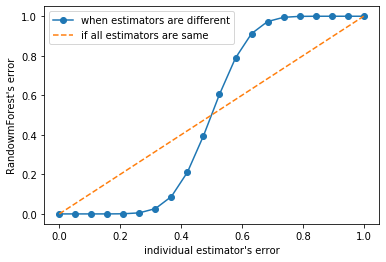

In [137]:
# 假设还是25棵树
x = np.linspace(0,1,20) # 基分类器的误差在0-1之间

y = []

for epsilon in x:
    E = np.array([comb(25,i) * (epsilon ** i) * ((1-epsilon)**(25-i)) for i in range(13, 26)]).sum()
    y.append(E)

plt.plot(x, y, "o-", label="when estimators are different")
plt.plot(x, x, "--", label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandowmForest's error")
plt.legend()
plt.show()

当所有基分类器（评估器）都相同，无论少数服从多数还是求平均，随机森林无法做到准确率比单独一棵树高，所以是一条45度的直线。所以这条线是基分类器的表现。

以从图像上看出，当基分类器的误差率小于0.5，即准确率大于0.5时，集成的效果是比基分类器要好的。相反，
当基分类器的误差率大于0.5，袋装的集成算法就失效了。**所以在使用随机森林之前，一定要检查，用来组成随机
森林的分类树们是否都有至少50%的预测正确率。**

## 3、RandomForestRegressor

`class sklearn.ensemble.RandomForestRegressor (n_estimators=’warn’, criterion=’mse’, max_depth=None,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’,
max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False,
n_jobs=None, random_state=None, verbose=0, warm_start=False)`

所有的参数，属性与接口，全部和随机森林分类器一致。仅有的不同就是回归树与分类树的不同，不纯度的指标，
参数Criterion不一致。

### 3.1、重要参数，属性与接口

#### criterion

回归树衡量分枝质量的指标，支持的标准有三种：

- 1）输入"mse"使用均方误差mean squared error(MSE)，父节点和叶子节点之间的均方误差的差额将被用来作为
特征选择的标准，这种方法通过使用叶子节点的均值来最小化L2损失
- 2）输入“friedman_mse”使用费尔德曼均方误差，这种指标使用弗里德曼针对潜在分枝中的问题改进后的均方误差
- 3）输入"mae"使用绝对平均误差MAE（mean absolute error），这种指标使用叶节点的中值来最小化L1损失
属性中最重要的依然是feature_importances_，接口依然是apply, fit, predict, score最核心。

     ![](../imgs/mse.png)
其中N是样本数量，i是每一个数据样本，fi是模型回归出的数值，yi是样本点i实际的数值标签。所以MSE的本质，
其实是样本真实数据与回归结果的差异。**在回归树中，MSE不只是我们的分枝质量衡量指标，也是我们最常用的衡
量回归树回归质量的指标**，当我们在使用交叉验证，或者其他方式获取回归树的结果时，我们往往选择均方误差作
为我们的评估（在分类树中这个指标是score代表的预测准确率）。在回归中，我们追求的是，**MSE越小越好**。

然而，**回归树的接口score返回的是R平方（R平方越接近1表示模型越好），并不是MSE。**R平方被定义如下：
     ![](../imgs/R2-u.png)
其中u是残差平方和（MSE * N），v是总平方和，N是样本数量，i是每一个数据样本，fi是模型回归出的数值，yi
是样本点i实际的数值标签。y帽是真实数值标签的平均数。R平方可以为正为负（如果模型的残差平方和远远大于
模型的总平方和，模型非常糟糕，R平方就会为负），而均方误差永远为正。

值得一提的是，**虽然均方误差永远为正，但是sklearn当中使用均方误差作为评判标准时，却是计算”负均方误
差“（neg_mean_squared_error）。**这是因为sklearn在计算模型评估指标的时候，会考虑指标本身的性质，均
方误差本身是一种误差，所以被sklearn划分为模型的一种损失(loss)，因此在sklearn当中，都以负数表示。**真正的均方误差MSE的数值，其实就是neg_mean_squared_error去掉负号的数字**。

#### 重要属性和接口

最重要的属性和接口，都与随机森林的分类器相一致，还是apply, fit, predict和score最为核心。值得一提的是，随
机森林回归并没有predict_proba这个接口，因为对于回归来说，并不存在一个样本要被分到某个类别的概率问
题，因此没有predict_proba这个接口。

- 随机森林回归用法

    和决策树完全一致，除了多了参数n_estimators

In [155]:
boston = load_boston()
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10
               ,scoring = "neg_mean_squared_error")

array([-10.72900447,  -5.36049859,  -4.74614178, -20.84946337,
       -12.23497347, -17.99274635,  -6.8952756 , -93.78884428,
       -29.80411702, -15.25776814])

In [157]:
# sklearn 当中的模型评估指标（打分）列表
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

返回十次交叉验证的结果，注意在这里，如果不填写scoring = "neg_mean_squared_error"，交叉验证默认的模型
衡量指标是R平方，因此交叉验证的结果可能有正也可能有负。而如果写上scoring，则衡量标准是负MSE，交叉验
证的结果只可能为负。

## 4、附录

### 4.1、Bagging vs Boosting

 
|  | 装袋法 Bagging | 提升法 Boosting |
| :---- |:---------------------------------| :---- |
| 评估器 | 相互独立，同时运行 | 相互关联，按顺序依次构建，后建的模型会在先建模型预测失败的样本上有更多的权重 |
| 抽样数集 | 有放回抽样 | 有放回抽样，但会确认数据的权重，每次抽样都会给容易预测失败的样本更多的权重 |
| 决定集成的结果 | 平均或少数服从多数原则 | 加权平均，在训练集上表现更好的模型会有更大的权重 |
| 目标 | 降低方差，提高模型整体的稳定性 | 降低偏差，提高模型整体的精确度 |
| 单个评估器存在过拟合问题的时候 | 能够一定程度上解决 过拟合问题 | 可能会加剧过拟合问题 |
| 单个评估器的效力比较弱的时候 | 不是非常有帮助 | 很可能会提升模型表现 |
| 代表算法 | 随机森林 | 梯度提升树，Adaboost |
